In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
tree_cover_loss=pd.read_csv('/content/treecover_loss__ha.csv')

In [3]:
tree_cover_loss.head()

,tsc_tree_cover_loss_drivers__type,umd_tree_cover_loss__year,umd_tree_cover_loss__ha,gfw_gross_emissions_co2e_all_gases__Mg
0,Commodity driven deforestation,2001,1.742690e+06,7.984231e+08
1,Commodity driven deforestation,2002,2.420659e+06,1.161669e+09
2,Commodity driven deforestation,2003,2.330707e+06,1.113439e+09
3,Commodity driven deforestation,2004,2.837072e+06,1.443578e+09
4,Commodity driven deforestation,2005,2.377256e+06,1.300751e+09


In [4]:
tree_cover_loss.shape
tree_cover_loss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   tsc_tree_cover_loss_drivers__type       120 non-null    object 
 1   umd_tree_cover_loss__year               120 non-null    int64  
 2   umd_tree_cover_loss__ha                 120 non-null    float64
 3   gfw_gross_emissions_co2e_all_gases__Mg  120 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.9+ KB


In [5]:
tree_cover_loss.isnull().sum()

tsc_tree_cover_loss_drivers__type         0
umd_tree_cover_loss__year                 0
umd_tree_cover_loss__ha                   0
gfw_gross_emissions_co2e_all_gases__Mg    0
dtype: int64

In [6]:
tree_cover_loss.loc[:,tree_cover_loss.all()]
tree_cover_loss.loc[:,tree_cover_loss.any()]
tree_cover_loss.loc[:,tree_cover_loss.isnull().any()] # lists 0 columns
tree_cover_loss.loc[:,tree_cover_loss.notnull().all()] # lists all rows & columns -- so no NaNs in data

,tsc_tree_cover_loss_drivers__type,umd_tree_cover_loss__year,umd_tree_cover_loss__ha,gfw_gross_emissions_co2e_all_gases__Mg
0,Commodity driven deforestation,2001,1.742690e+06,7.984231e+08
1,Commodity driven deforestation,2002,2.420659e+06,1.161669e+09
2,Commodity driven deforestation,2003,2.330707e+06,1.113439e+09
3,Commodity driven deforestation,2004,2.837072e+06,1.443578e+09
4,Commodity driven deforestation,2005,2.377256e+06,1.300751e+09
...,...,...,...,...
115,Wildfire,2016,2.599069e+03,8.648082e+05
116,Wildfire,2017,9.716683e+02,4.505907e+05
117,Wildfire,2018,2.482610e+02,1.508845e+05
118,Wildfire,2019,3.042653e+02,1.839891e+05


In [7]:
#Number of unique values in each column
tree_cover_loss.nunique(axis=0)

tsc_tree_cover_loss_drivers__type           6
umd_tree_cover_loss__year                  20
umd_tree_cover_loss__ha                   120
gfw_gross_emissions_co2e_all_gases__Mg    120
dtype: int64

In [8]:
print('Number of tree loss driver type:',len(tree_cover_loss['tsc_tree_cover_loss_drivers__type'].unique().tolist()))

Number of tree loss driver type: 6


In [9]:
#To print the types of tree loss driver
tree_loss_driver_types=tree_cover_loss['tsc_tree_cover_loss_drivers__type'].unique()
print(tree_loss_driver_types)

['Commodity driven deforestation' 'Forestry' 'Shifting agriculture'
 'Unknown' 'Urbanization' 'Wildfire']


In [10]:
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

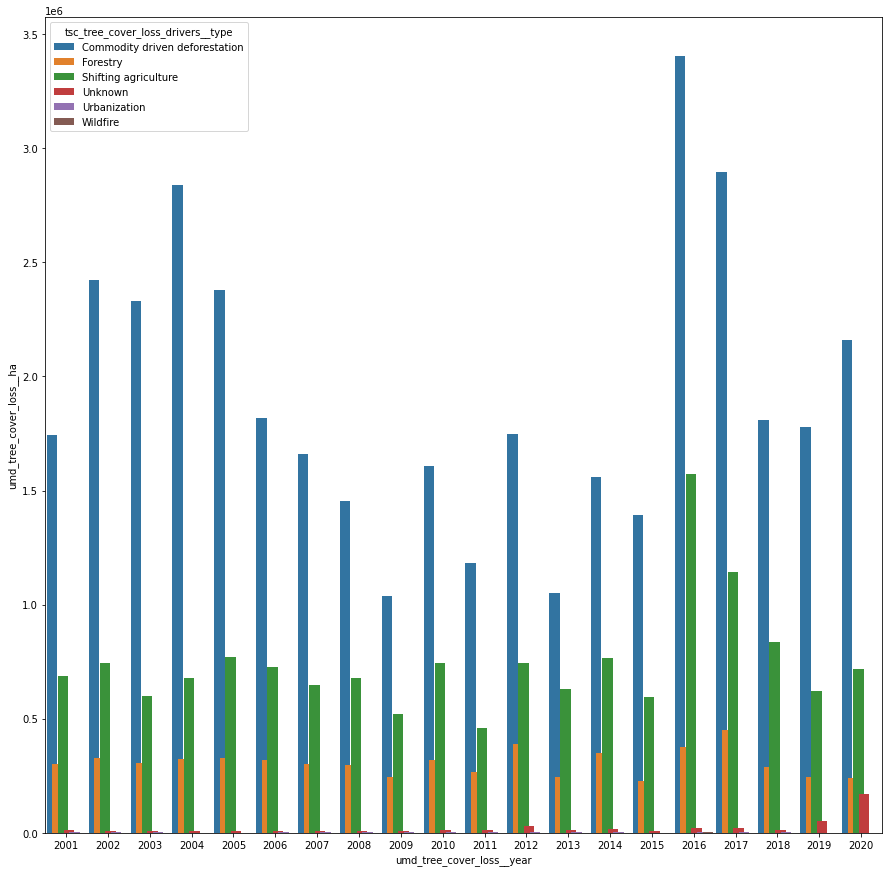

In [11]:
fig, ax = plt.subplots(figsize=(15,15))
sns.barplot(x="umd_tree_cover_loss__year",y="umd_tree_cover_loss__ha",hue="tsc_tree_cover_loss_drivers__type", ax=ax, data=tree_cover_loss)
change_width(ax, .25)
plt.show()

In [12]:
#changing the format of dataframe to plot a stacked bar plot
tcl=chk=tree_cover_loss.pivot(index='umd_tree_cover_loss__year',columns='tsc_tree_cover_loss_drivers__type',values='umd_tree_cover_loss__ha')
temp=tcl.sum(axis=1) #to sum area of all driver type in  a year
tcl['Sum_area_ha_all_driver']=temp
tcl.head()
#All area in ha

tsc_tree_cover_loss_drivers__type,Commodity driven deforestation,Forestry,Shifting agriculture,Unknown,Urbanization,Wildfire,Sum_area_ha_all_driver
umd_tree_cover_loss__year,,,,,,,
2001,1.742690e+06,300866.166111,689061.463720,11376.709570,1783.749616,583.171533,2.746362e+06
2002,2.420659e+06,329941.525455,745267.144469,8298.783642,2460.107204,423.203414,3.507049e+06
2003,2.330707e+06,306647.392478,600425.494190,8437.183861,1885.243263,423.959898,3.248527e+06
2004,2.837072e+06,322152.520688,677406.787157,9845.113600,1619.392736,675.124224,3.848771e+06
2005,2.377256e+06,328523.284186,768727.728765,9691.179528,1601.832286,763.135149,3.486563e+06


In [13]:
tree_cover_loss['tsc_tree_cover_loss_drivers__type'].unique()

array(['Commodity driven deforestation', 'Forestry',
       'Shifting agriculture', 'Unknown', 'Urbanization', 'Wildfire'],
      dtype=object)

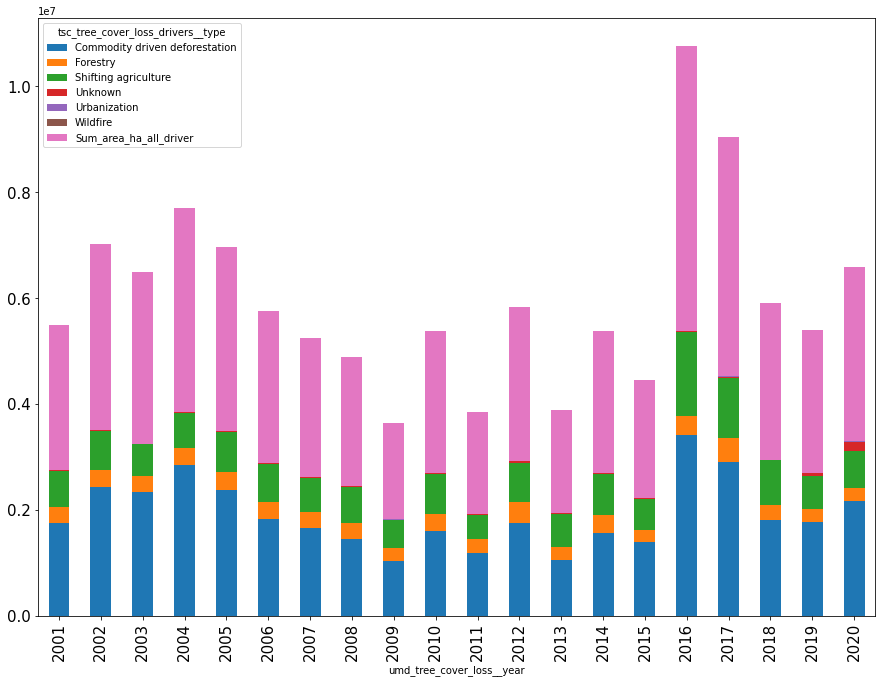

In [14]:
#fig.set_size_inches(30, 20)
fig, ax = plt.subplots(figsize=(15,11))
tcl.plot.bar(stacked=True, ax=ax, fontsize=15)
plt.savefig('deforestation_drivers_stack.png')
plt.show()

In [15]:
#To sum the tcl over years
sum_area_all_driver_over_years=tcl.sum(axis=0)
print(sum_area_all_driver_over_years)
total_sum=sum_area_all_driver_over_years[6]
print('Total sum: ',total_sum)
sum_area_all_driver_over_years=sum_area_all_driver_over_years[0:6]
type(sum_area_all_driver_over_years)
percnt_area_all_driver_over_years=sum_area_all_driver_over_years/total_sum*100.
print(percnt_area_all_driver_over_years)

tsc_tree_cover_loss_drivers__type
Commodity driven deforestation    3.826468e+07
Forestry                          6.155399e+06
Shifting agriculture              1.488682e+07
Unknown                           4.590232e+05
Urbanization                      4.565201e+04
Wildfire                          1.411327e+04
Sum_area_ha_all_driver            5.982569e+07
dtype: float64
Total sum:  59825691.272243544
tsc_tree_cover_loss_drivers__type
Commodity driven deforestation    63.960286
Forestry                          10.288889
Shifting agriculture              24.883659
Unknown                            0.767268
Urbanization                       0.076308
Wildfire                           0.023591
dtype: float64


In [16]:
print(percnt_area_all_driver_over_years.values)
print(percnt_area_all_driver_over_years.index.values)

#To create a .csv file with percentage of different drivers of deforestation
tcl_percnt_drivers=pd.DataFrame({'Deforestation_drivers_type':percnt_area_all_driver_over_years.index.values, 'deforstation_percentage':percnt_area_all_driver_over_years.values})
tcl_percnt_drivers.info()
tcl_percnt_drivers.head(20)
tcl_percnt_drivers.to_csv('/content/deforestation_drivers_percentage.csv')

[6.39602858e+01 1.02888886e+01 2.48836589e+01 7.67267659e-01
 7.63083750e-02 2.35906493e-02]
['Commodity driven deforestation' 'Forestry' 'Shifting agriculture'
 'Unknown' 'Urbanization' 'Wildfire']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Deforestation_drivers_type  6 non-null      object 
 1   deforstation_percentage     6 non-null      float64
dtypes: float64(1), object(1)
memory usage: 224.0+ bytes


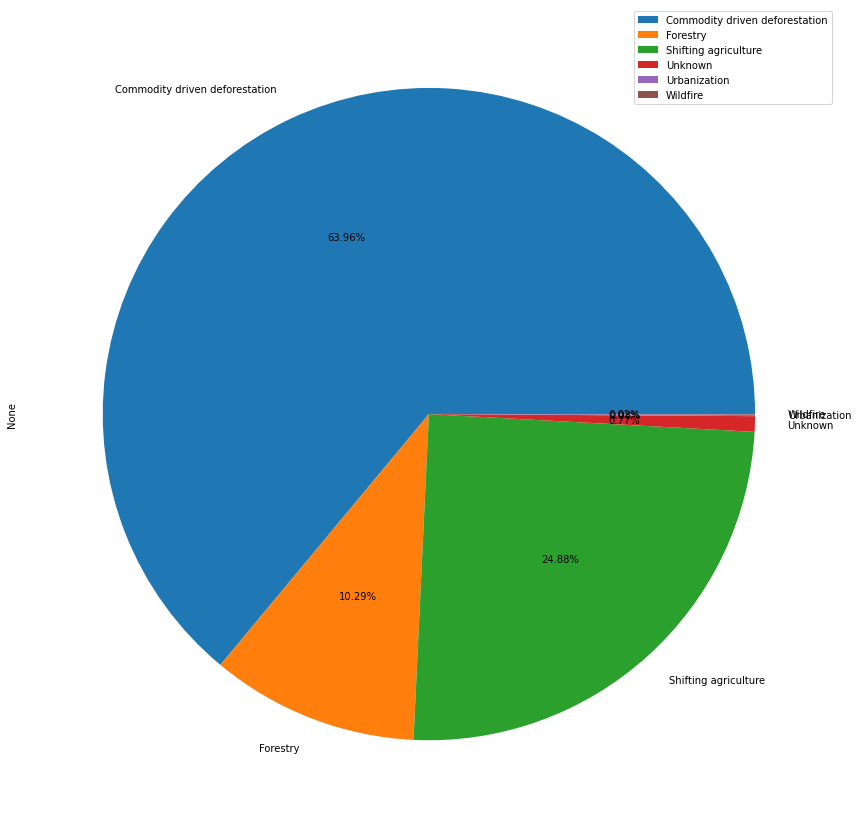

In [17]:
fig1, ax1=plt.subplots()
percnt_area_all_driver_over_years.plot.pie(figsize=(25,15), autopct='%1.2f%%')
plt.legend(loc='upper right')
plt.savefig('deforestation_drivers_percentage.png')

Bar plot of different types of driver

In [18]:
#dateframe related to commodity driven deforestation
cdd_indices = tree_cover_loss['tsc_tree_cover_loss_drivers__type'] == 'Commodity driven deforestation'
cdd_df=tree_cover_loss.loc[cdd_indices,:]

#dateframe related to Forestry
forestry_indices = tree_cover_loss['tsc_tree_cover_loss_drivers__type'] == 'Forestry'
forestry_df=tree_cover_loss.loc[forestry_indices,:]

#dateframe related to Shifting agriculture
sa_indices = tree_cover_loss['tsc_tree_cover_loss_drivers__type'] == 'Shifting agriculture'
sa_df=tree_cover_loss.loc[sa_indices,:]

#dateframe related to Urbanization
urbanization_indices = tree_cover_loss['tsc_tree_cover_loss_drivers__type'] == 'Urbanization'
urbanization_df=tree_cover_loss.loc[urbanization_indices,:]

#dateframe related to Wildfire
wildfire_indices = tree_cover_loss['tsc_tree_cover_loss_drivers__type'] == 'Wildfire'
wildfire_df=tree_cover_loss.loc[wildfire_indices,:]

#dateframe related to Unknown
unknown_indices = tree_cover_loss['tsc_tree_cover_loss_drivers__type'] == 'Unknown'
unknown_df=tree_cover_loss.loc[unknown_indices,:]


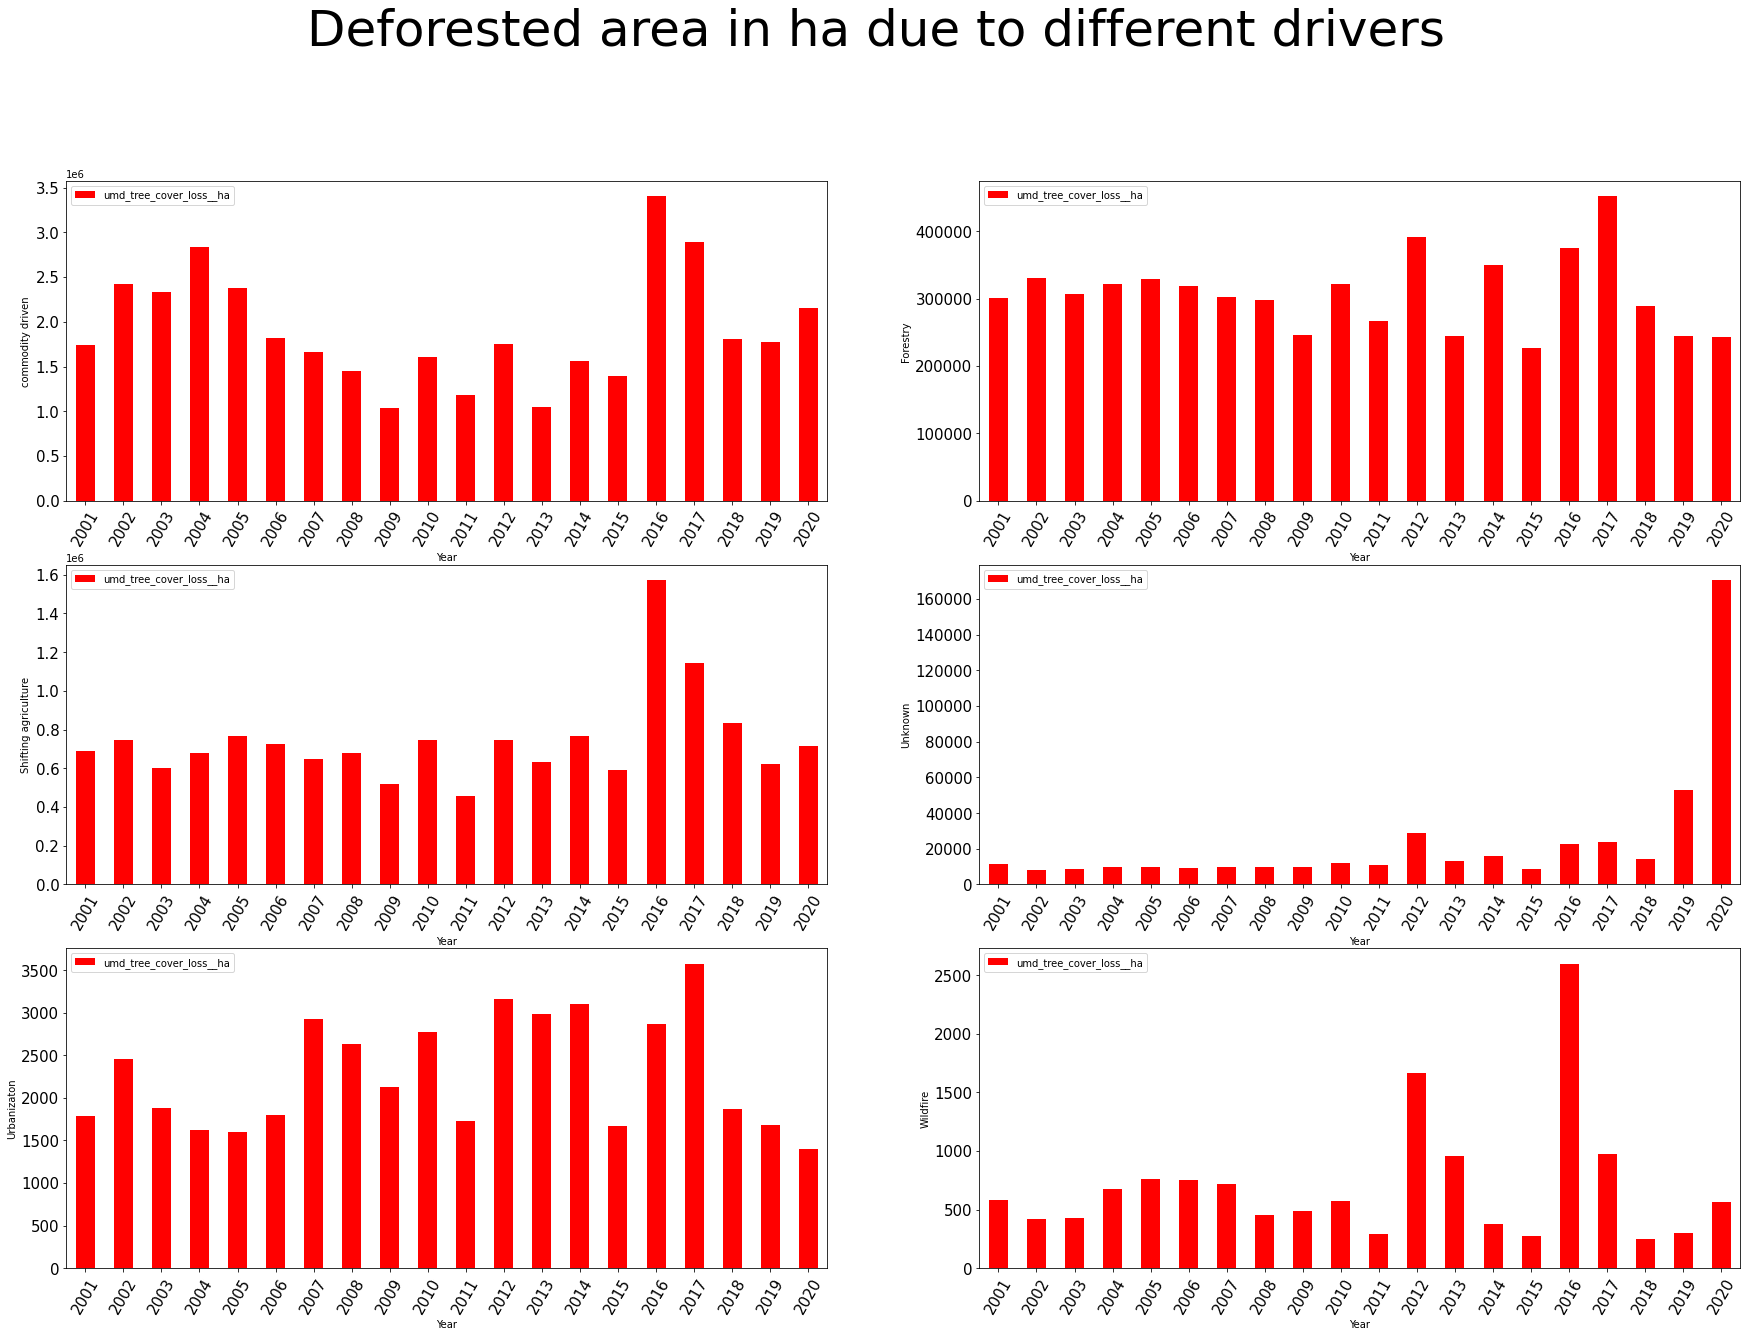

In [19]:
fig, axes=plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(30, 20)
cdd_df.plot(x='umd_tree_cover_loss__year',y='umd_tree_cover_loss__ha',kind='bar',ax=axes[0,0],color='r',xlabel='Year',ylabel='commodity driven',rot=60,fontsize=15)
forestry_df.plot(x='umd_tree_cover_loss__year',y='umd_tree_cover_loss__ha',kind='bar',ax=axes[0,1],color='r',xlabel='Year',ylabel='Forestry',rot=60,fontsize=15)
sa_df.plot(x='umd_tree_cover_loss__year',y='umd_tree_cover_loss__ha',kind='bar',ax=axes[1,0],color='r',xlabel='Year',ylabel='Shifting agriculture',rot=60,fontsize=15)
unknown_df.plot(x='umd_tree_cover_loss__year',y='umd_tree_cover_loss__ha',kind='bar',ax=axes[1,1],color='r',xlabel='Year',ylabel='Unknown',rot=60,fontsize=15)
urbanization_df.plot(x='umd_tree_cover_loss__year',y='umd_tree_cover_loss__ha',kind='bar',ax=axes[2,0],color='r',xlabel='Year',ylabel='Urbanizaton',rot=60,fontsize=15)
wildfire_df.plot(x='umd_tree_cover_loss__year',y='umd_tree_cover_loss__ha',kind='bar',ax=axes[2,1],color='r',xlabel='Year',ylabel='Wildfire',rot=60,fontsize=15)
plt.suptitle('Deforested area in ha due to different drivers', x=0.5, y=1.001, ha='center', fontsize=50.)
plt.show()